In [1]:
!pip install pandas

In [2]:
import pandas as pd


#ler raw dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
clientes = pd.read_json(url)

#normalização
customer_df = pd.json_normalize(clientes['customer'], sep='_')
phone_df = pd.json_normalize(clientes['phone'], sep='_')
internet_df = pd.json_normalize(clientes['internet'], sep='_')
account_df = pd.json_normalize(clientes['account'], sep='_')

#manter dataframe
clientes = pd.concat([
    clientes[['customerID', 'Churn']],
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

In [3]:
clientes.head(1) #verificar tabela/colunas

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3


In [4]:
clientes.fillna(0, inplace=True) #preencher NaNs com 0

In [5]:
clientes['Charges_Total'] = (
    clientes['Charges_Total']
    .astype(str)  #primeiro setando como string para aplicar o regex
    .str.replace('[^\d.]', '', regex=True)  #nao remove números e pontos
    .replace('', '0')  #strings vazias recebem 0
    .astype(float)  #conversão float
)

In [6]:
clientes['tenure'] = pd.to_numeric(clientes['tenure'], errors='coerce').fillna(0) #conversão para tipo numerico e preenchimento de NaNs
clientes['Charges_Monthly'] = pd.to_numeric(clientes['Charges_Monthly'], errors='coerce').fillna(0)
clientes['Charges_Total'] = pd.to_numeric(clientes['Charges_Total'], errors='coerce').fillna(0)

# Corrigir inconsistências em colunas categóricas (ex: 'gender')
clientes['gender'] = clientes['gender'].str.lower().replace({'male': 'masculino', 'female': 'feminino'}) #tratamento

In [7]:
#preencher com 0 os nulos nessas situações
clientes.replace(['null', 'NA', 'N/A', ''], 0, inplace=True)

#remover duplicação
clientes.drop_duplicates(inplace=True)

In [8]:
#padronizaçã
clientes['InternetService'] = clientes['InternetService'].str.lower()

#mapeamento valores bin. onde há yes, vai 1; onde há no, vai 0
clientes['Churn'] = clientes['Churn'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
clientes['Partner'] = clientes['Partner'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
clientes['Dependents'] = clientes['Dependents'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
clientes['PhoneService'] = clientes['PhoneService'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
clientes['MultipleLines'] = clientes['MultipleLines'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
clientes['OnlineBackup'] = clientes['OnlineBackup'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
clientes['DeviceProtection'] = clientes['DeviceProtection'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
clientes['TechSupport'] = clientes['TechSupport'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
clientes['StreamingTV'] = clientes['StreamingTV'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
clientes['StreamingMovies'] = clientes['StreamingMovies'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
clientes['PaperlessBilling'] = clientes['PaperlessBilling'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
clientes['OnlineSecurity'] = clientes['OnlineSecurity'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)

#tipo contract: objeto
clientes['Contract'] = clientes['Contract'].astype('object')

In [9]:
#print(clientes.head())
print("\nTipos de dados:\n", clientes.dtypes)
print("\nValores nulos restantes:\n", clientes.isnull().sum())


Tipos de dados:
 customerID           object
Churn                 int64
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
Charges_Monthly     float64
Charges_Total       float64
dtype: object

Valores nulos restantes:
 customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
C

## TAXA DE CANCELAMENTO

/tmp/ipython-input-500200242.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")


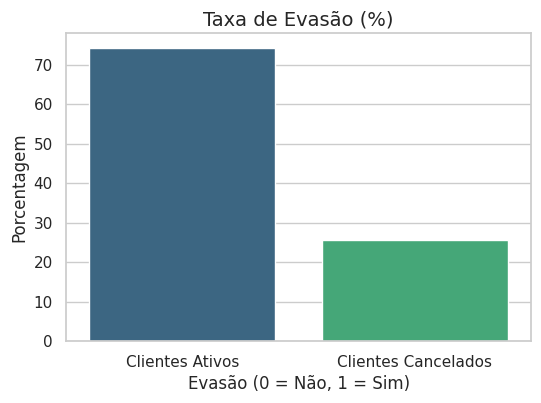

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo
sns.set_theme(style="whitegrid")

# Taxa de evasao
plt.figure(figsize=(6, 4))
churn_rate = clientes['Churn'].value_counts(normalize=True) * 100
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")
plt.title("Taxa de Evasão (%)", fontsize=14)
plt.xlabel("Evasão (0 = Não, 1 = Sim)")
plt.ylabel("Porcentagem")
plt.xticks([0, 1], ["Clientes Ativos", "Clientes Cancelados"])
plt.show()

## EVASÃO POR TEMPO DE CONTRATO (ternure)

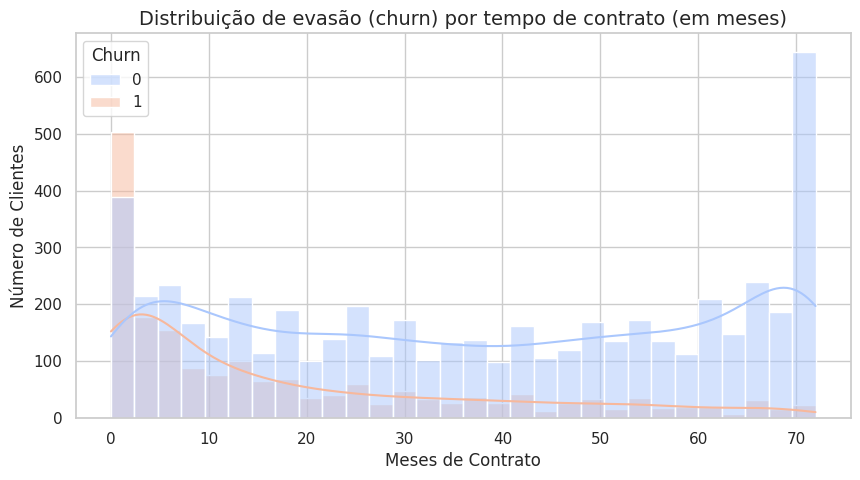

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=clientes, x='tenure', hue='Churn', bins=30, kde=True, palette="coolwarm")
plt.title("Distribuição de evasão (churn) por tempo de contrato (em meses)", fontsize=14)
plt.xlabel("Meses de Contrato")
plt.ylabel("Número de Clientes")
plt.show()

## EVASÃO POR GASTO MENSAL (Monthly)

/tmp/ipython-input-2717584535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clientes, x='Churn', y='Charges_Monthly', palette="Set2")


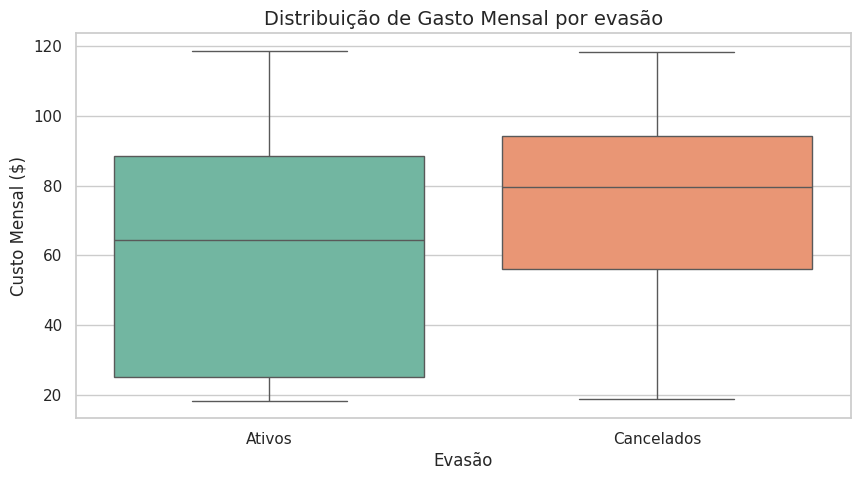

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=clientes, x='Churn', y='Charges_Monthly', palette="Set2")
plt.title("Distribuição de Gasto Mensal por evasão", fontsize=14)
plt.xlabel("Evasão")
plt.ylabel("Custo Mensal ($)")
plt.xticks([0, 1], ["Ativos", "Cancelados"])
plt.show()

## EVASÃO POR TIPO DE CONTRATO

/tmp/ipython-input-1459791025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_churn.index, y=contract_churn.values, palette="rocket")


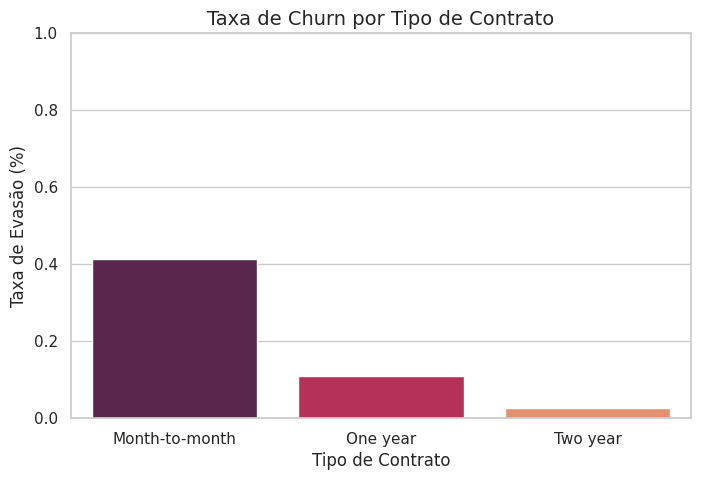

In [13]:
plt.figure(figsize=(8, 5))
contract_churn = clientes.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
sns.barplot(x=contract_churn.index, y=contract_churn.values, palette="rocket")
plt.title("Taxa de Churn por Tipo de Contrato", fontsize=14)
plt.xlabel("Tipo de Contrato")
plt.ylabel("Taxa de Evasão (%)")
plt.ylim(0, 1)
plt.show()

## CORRELAÇÃO ENTRE VARIÁVEIS

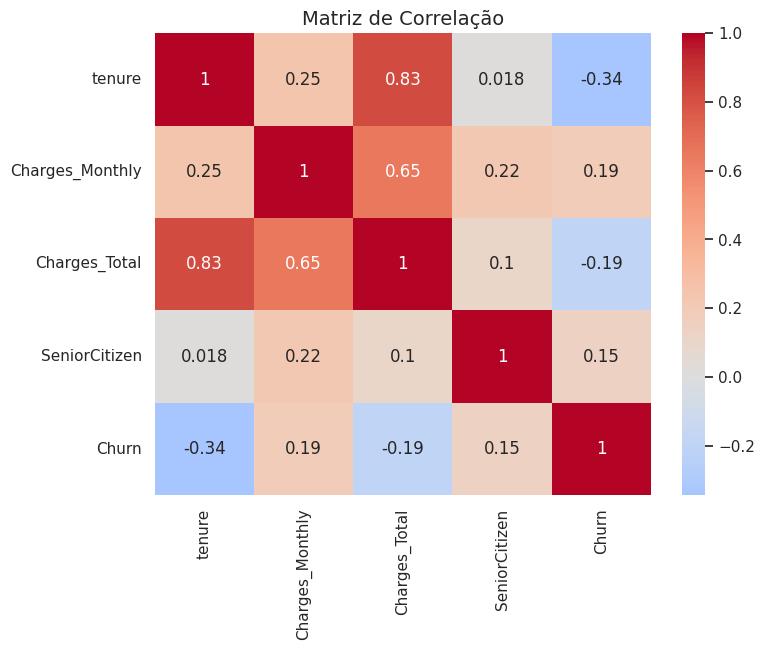

In [14]:
# Selecionar colunas numéricas e calcular correlação
numeric_cols = ['tenure', 'Charges_Monthly', 'Charges_Total', 'SeniorCitizen', 'Churn']
corr_matrix = clientes[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação", fontsize=14)
plt.show()

## EVASÃO POR SERVIÇOS ADICIONAIS (Internet)

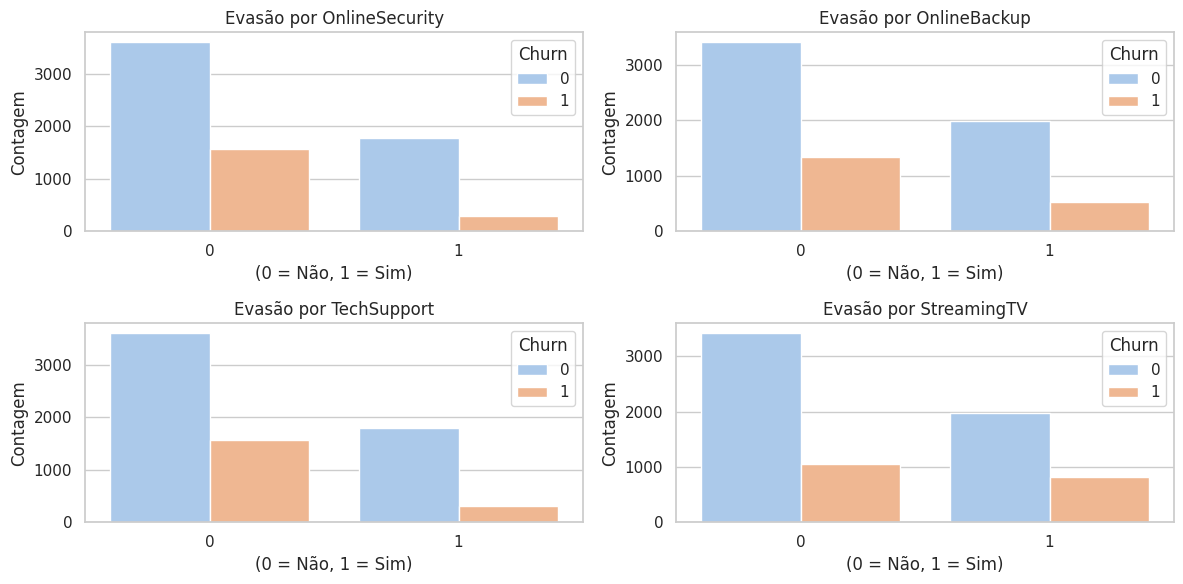

In [15]:
services = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV']
plt.figure(figsize=(12, 6))
for i, service in enumerate(services, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=clientes, x=service, hue='Churn', palette="pastel")
    plt.title(f"Evasão por {service}")
    plt.xlabel("(0 = Não, 1 = Sim)")
    plt.ylabel("Contagem")
plt.tight_layout()
plt.show()

## EVASÃO POR FORMA DE PAGAMENTO (Payment Method)

/tmp/ipython-input-840452010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_churn.index, y=payment_churn.values, palette="mako")


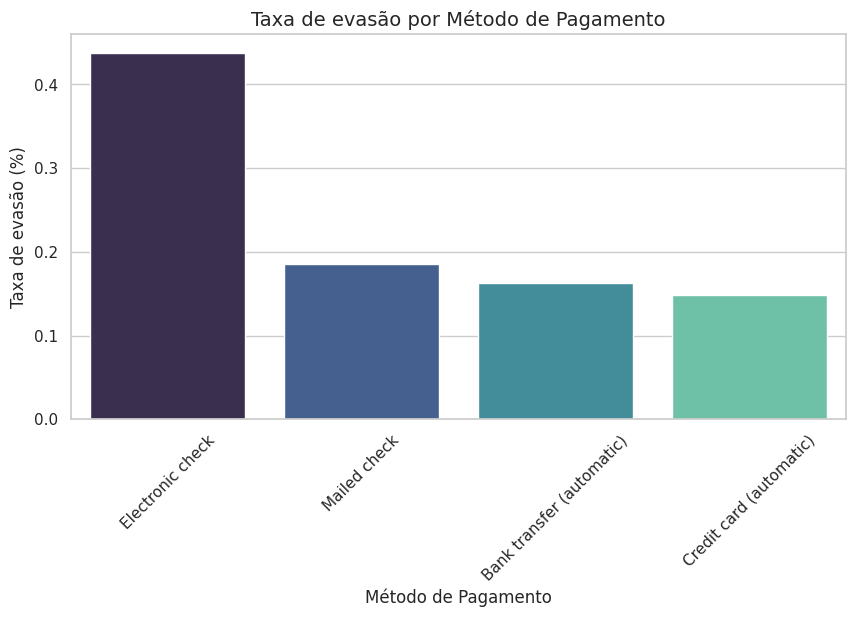

In [16]:
plt.figure(figsize=(10, 5))
payment_churn = clientes.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)
sns.barplot(x=payment_churn.index, y=payment_churn.values, palette="mako")
plt.title("Taxa de evasão por Método de Pagamento", fontsize=14)
plt.xlabel("Método de Pagamento")
plt.ylabel("Taxa de evasão (%)")
plt.xticks(rotation=45)
plt.show()

# ANÁLISE DEMOGRÁFICA

## Distribuição por gênero e idade

/tmp/ipython-input-2666135368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clientes, x='gender', palette='pastel')
/tmp/ipython-input-2666135368.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clientes, x='SeniorCitizen', palette='coolwarm')


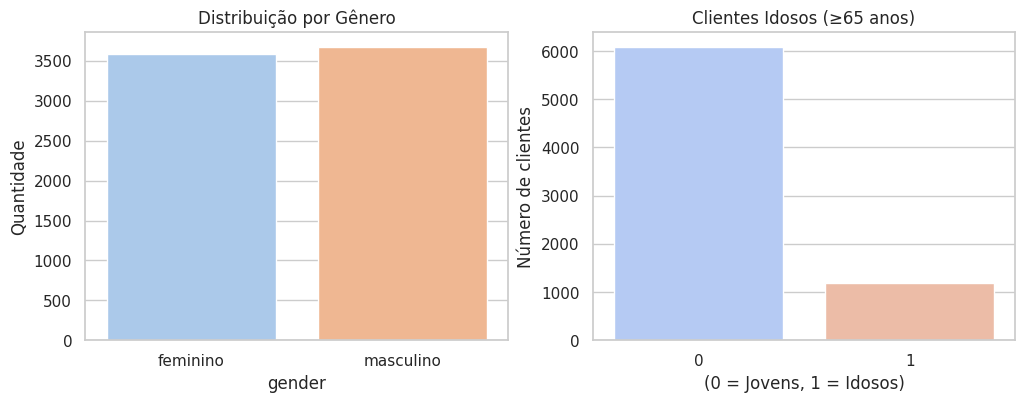

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=clientes, x='gender', palette='pastel')
plt.ylabel('Quantidade')
plt.title('Distribuição por Gênero')

plt.subplot(1, 2, 2)
sns.countplot(data=clientes, x='SeniorCitizen', palette='coolwarm')
plt.xlabel('(0 = Jovens, 1 = Idosos)')
plt.ylabel('Número de clientes')
plt.title('Clientes Idosos (≥65 anos)')
plt.show()

## TAXA DE CANCELAMENTO

/tmp/ipython-input-1946898978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Ativos', 'Cancelados'], y=clientes['Churn'].value_counts(normalize=True), palette='viridis')


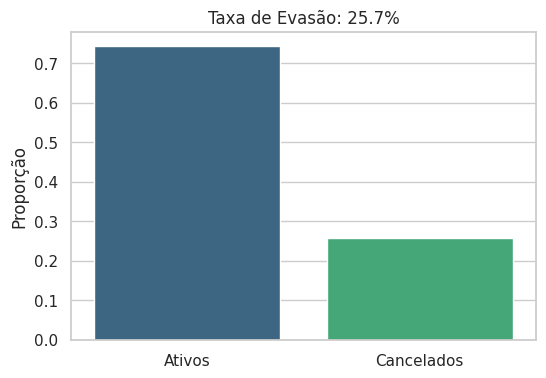

In [18]:
churn_rate = clientes['Churn'].mean() * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=['Ativos', 'Cancelados'], y=clientes['Churn'].value_counts(normalize=True), palette='viridis')
plt.title(f'Taxa de Evasão: {churn_rate:.1f}%')
plt.ylabel('Proporção')
plt.show()

## EVASÃO POR GASTO MENSAL

/tmp/ipython-input-1527271620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clientes, x='Churn', y='Charges_Monthly', palette='Set2')


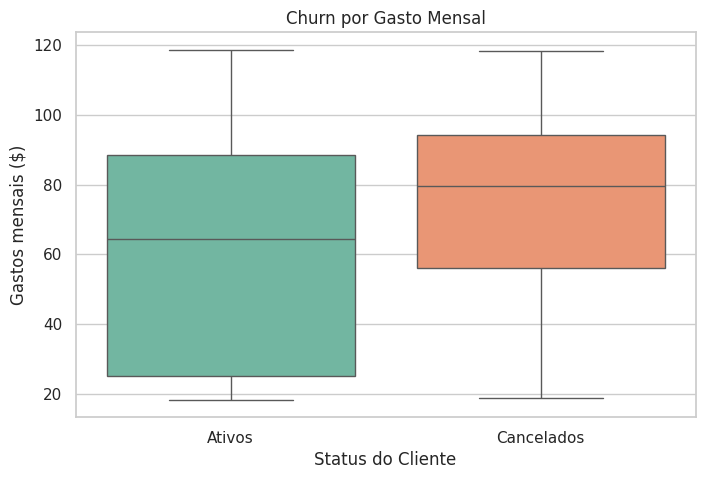

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=clientes, x='Churn', y='Charges_Monthly', palette='Set2')
plt.title('Churn por Gasto Mensal')
plt.xlabel('Status do Cliente')
plt.ylabel('Gastos mensais ($)')
plt.xticks([0, 1], ['Ativos', 'Cancelados'])
plt.show()

## EVASÃO POR TEMPO DE CONTRATO (Tenure)

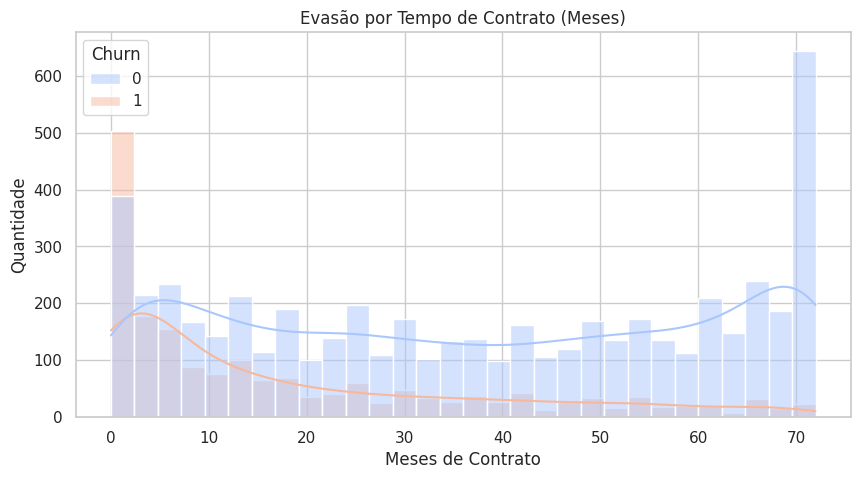

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(data=clientes, x='tenure', hue='Churn', bins=30, kde=True, palette='coolwarm')
plt.title('Evasão por Tempo de Contrato (Meses)')
plt.xlabel('Meses de Contrato')
plt.ylabel('Quantidade')
plt.show()

## EVASÃO POR TIPO DE CONTRATO

/tmp/ipython-input-2160192130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_churn.index, y=contract_churn.values, palette='rocket')


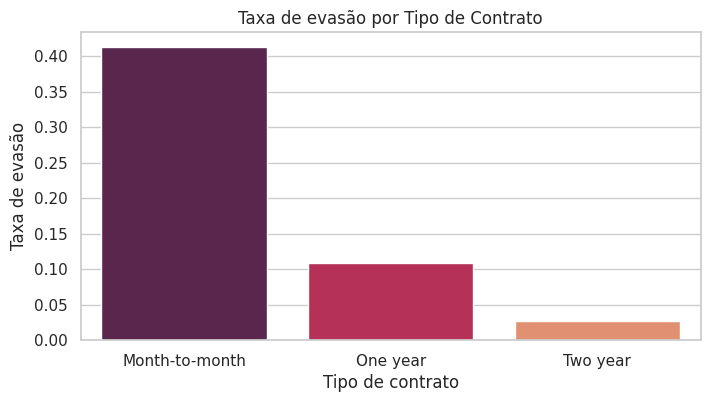

In [21]:
contract_churn = clientes.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=contract_churn.index, y=contract_churn.values, palette='rocket')
plt.title('Taxa de evasão por Tipo de Contrato')
plt.ylabel('Taxa de evasão')
plt.xlabel('Tipo de contrato')
plt.show()

## EVASÃO POR SERVIÇOS ADICIONAIS

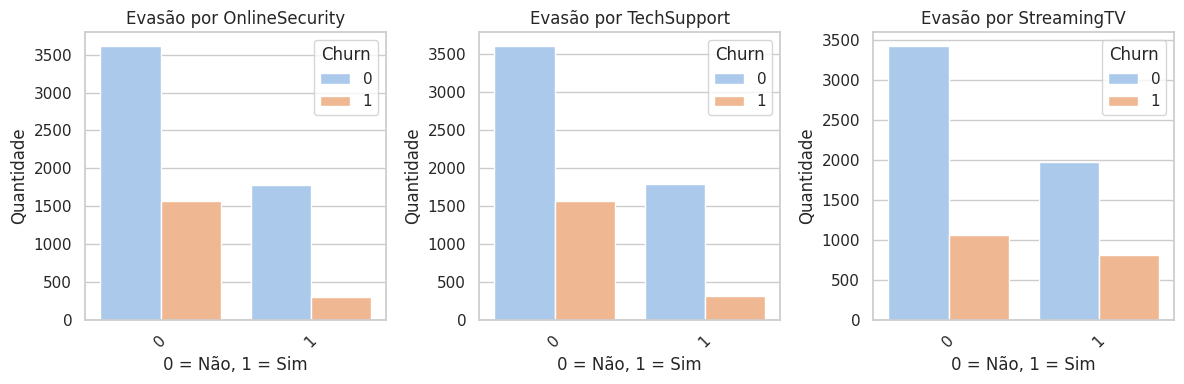

In [22]:
services = ['OnlineSecurity', 'TechSupport', 'StreamingTV']
plt.figure(figsize=(12, 4))
for i, service in enumerate(services, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=clientes, x=service, hue='Churn', palette='pastel')
    plt.title(f'Evasão por {service.split(".")[-1]}')
    plt.xticks(rotation=45)
    plt.ylabel('Quantidade')
    plt.xlabel('0 = Não, 1 = Sim')
plt.tight_layout()
plt.show()

## CORRELAÇÕES

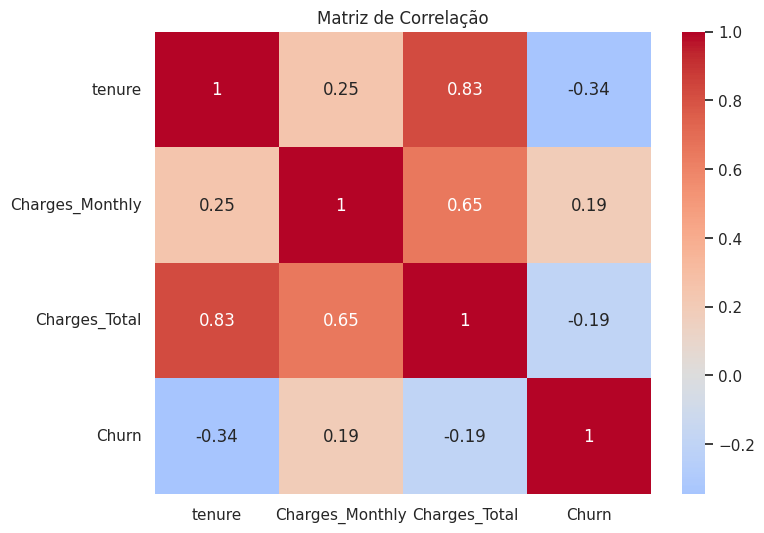

In [23]:
numeric_cols = ['tenure', 'Charges_Monthly', 'Charges_Total', 'Churn']
corr = clientes[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

## COLUNAS RELEVANTES PARA ANÁLISE DE EVASAO

In [24]:
colunas_relevantes = ['tenure',
                    'Contract',
                    'Charges_Monthly',
                    'OnlineSecurity',
                    'PaperlessBilling',
                    'Charges_Total',
                    'Senior_Citizen',
                    'TechSupport'
]


## CRIAR COLUNA CONTAS_DIARIAS

In [25]:
#calculo valor diario

# Supondo que 'clientes' já está carregado e tem a coluna 'MonthlyCharges'
clientes['Contas_Diarias'] = clientes['Charges_Monthly'] / 30  # Considera 30 dias/mês

# Arredonda para 2 casas decimais
clientes['Contas_Diarias'] = clientes['Contas_Diarias'].round(2)

# Mostrar as primeiras linhas
print(clientes[['customerID', 'Charges_Monthly', 'Contas_Diarias']].head())

   customerID  Charges_Monthly  Contas_Diarias
0  0002-ORFBO             65.6            2.19
1  0003-MKNFE             59.9            2.00
2  0004-TLHLJ             73.9            2.46
3  0011-IGKFF             98.0            3.27
4  0013-EXCHZ             83.9            2.80


/tmp/ipython-input-2835218501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clientes, x='Churn', y='Contas_Diarias', palette='Set2')


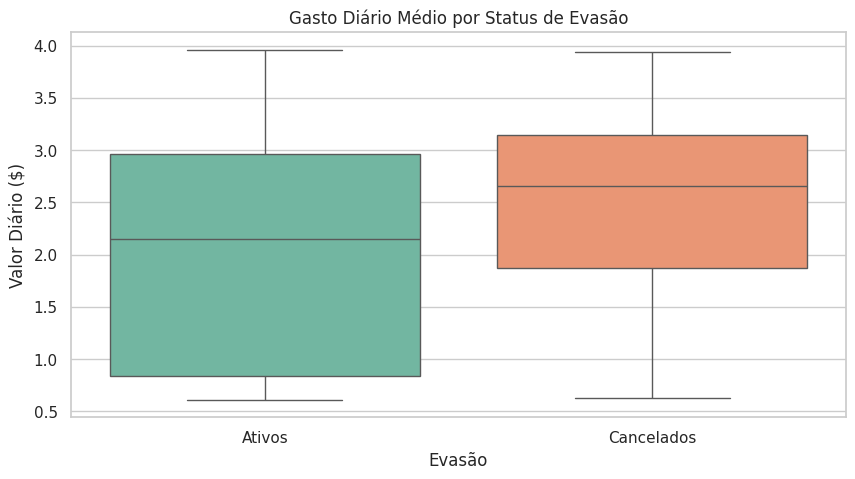

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=clientes, x='Churn', y='Contas_Diarias', palette='Set2')
plt.title('Gasto Diário Médio por Status de Evasão')
plt.xlabel('Evasão')
plt.ylabel('Valor Diário ($)')
plt.xticks([0, 1], ['Ativos', 'Cancelados'])
plt.show()

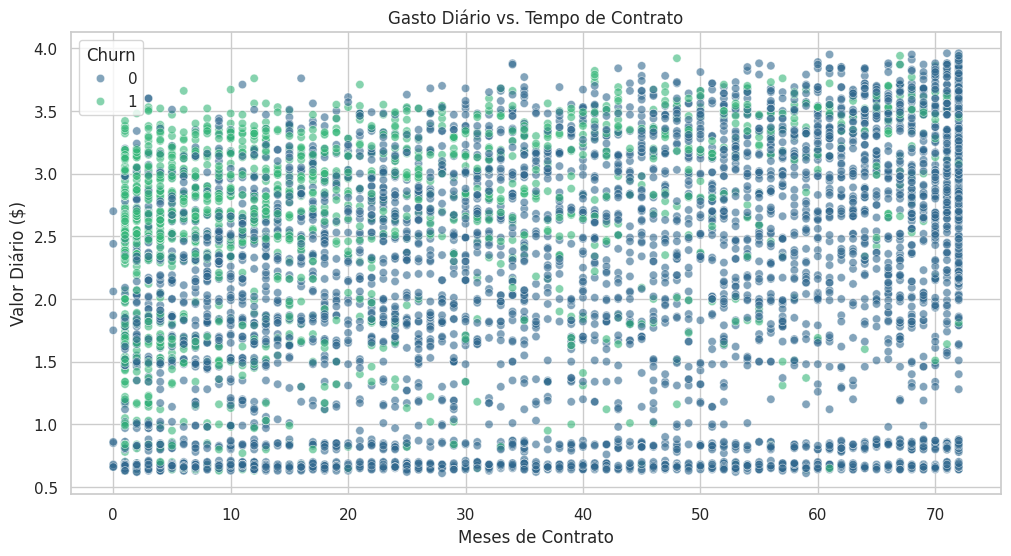

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=clientes,
    x='tenure',
    y='Contas_Diarias',
    hue='Churn',
    alpha=0.6,
    palette='viridis'
)
plt.title('Gasto Diário vs. Tempo de Contrato')
plt.xlabel('Meses de Contrato')
plt.ylabel('Valor Diário ($)')
plt.show()

/tmp/ipython-input-2989109739.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


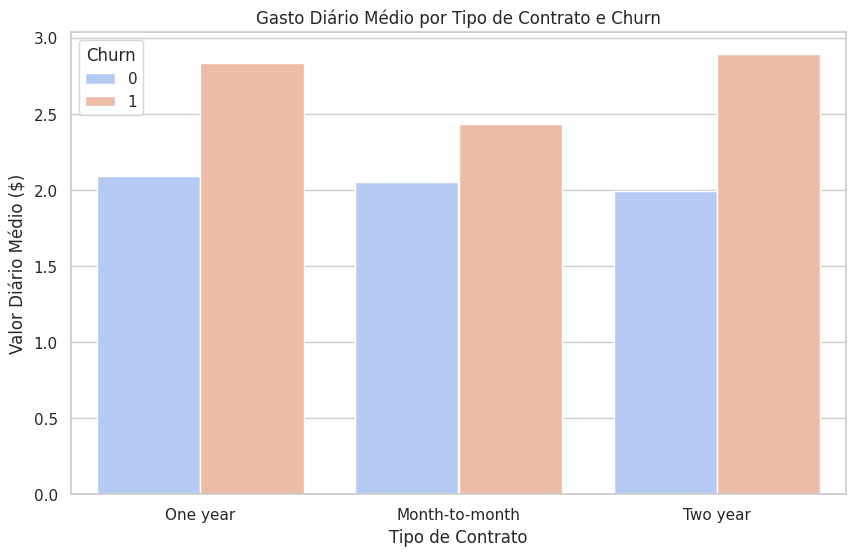

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=clientes,
    x='Contract',
    y='Contas_Diarias',
    hue='Churn',
    ci=None,
    palette='coolwarm'
)
plt.title('Gasto Diário Médio por Tipo de Contrato e Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Valor Diário Médio ($)')
plt.show()

## CÁLCULO MÉTRICAS: MÉDIA, MEDIANA, DESVIO PADRÃO, E OUTRAS MEDIDAS

In [29]:
#col relevantes
numeric_cols = ['tenure', 'Charges_Monthly', 'Charges_Total', 'Contas_Diarias']
desc_stats = clientes[numeric_cols].describe().transpose()
#mediana
desc_stats['median'] = clientes[numeric_cols].median()
#assimetria
desc_stats['skewness'] = clientes[numeric_cols].skew()

print(desc_stats[['count',
                    'mean',
                    'median',
                    'std',
                    'min',
                    '25%',
                    '50%',
                    '75%',
                    'max',
                    'skewness']])

                  count         mean   median          std    min      25%  \
tenure           7267.0    32.346498    29.00    24.571773   0.00    9.000   
Charges_Monthly  7267.0    64.720098    70.30    30.129572  18.25   35.425   
Charges_Total    7267.0  2277.182035  1389.20  2268.648587   0.00  396.200   
Contas_Diarias   7267.0     2.157292     2.34     1.004407   0.61    1.180   

                     50%       75%      max  skewness  
tenure             29.00    55.000    72.00  0.239523  
Charges_Monthly    70.30    89.875   118.75 -0.216539  
Charges_Total    1389.20  3778.525  8684.80  0.965766  
Contas_Diarias      2.34     2.995     3.96 -0.216544  


In [30]:
#variaveis categoricas
categorical_cols = ['gender', 'SeniorCitizen', 'Contract', 'OnlineSecurity']
for col in categorical_cols:
    print(f"\n{col}:")
    print(clientes[col].value_counts(normalize=True) * 100)


gender:
gender
masculino    50.571075
feminino     49.428925
Name: proportion, dtype: float64

SeniorCitizen:
SeniorCitizen
0    83.734691
1    16.265309
Name: proportion, dtype: float64

Contract:
Contract
Month-to-month    55.112151
Two year          23.985138
One year          20.902711
Name: proportion, dtype: float64

OnlineSecurity:
OnlineSecurity
0    71.404981
1    28.595019
Name: proportion, dtype: float64


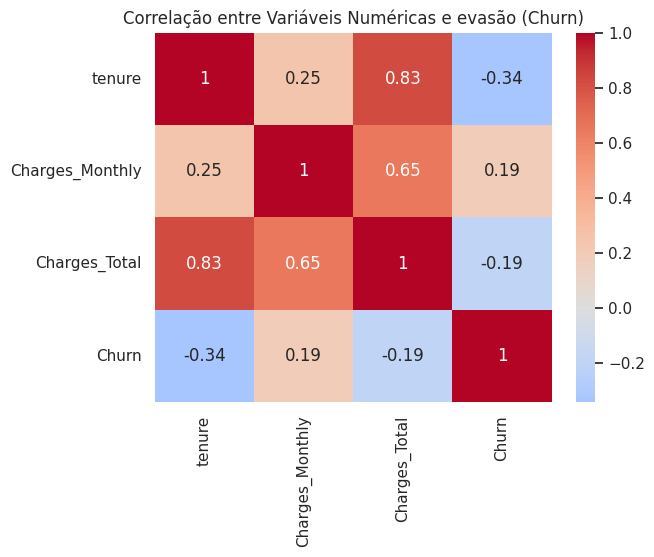

In [31]:
#analise correlaçao
corr = clientes[['tenure', 'Charges_Monthly', 'Charges_Total', 'Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre Variáveis Numéricas e evasão (Churn)')
plt.show()

/tmp/ipython-input-2961513372.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clientes, y='Charges_Monthly', palette='Set2')


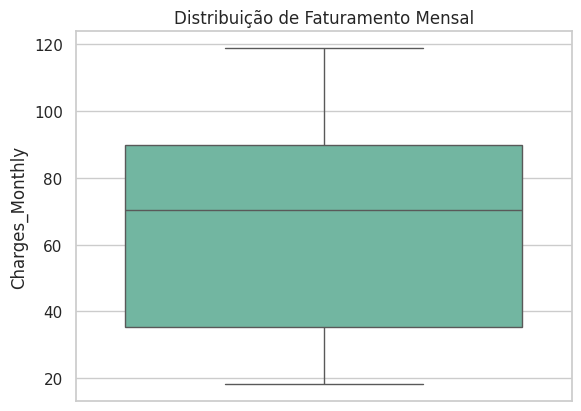

In [32]:
#outliers
#boxplt para Charges Monthly
sns.boxplot(data=clientes, y='Charges_Monthly', palette='Set2')
plt.title('Distribuição de Faturamento Mensal')
plt.show()

In [33]:
#principais metricas
#comparaçao clientes que cancelaram e ativos
churn_stats = clientes.groupby('Churn')[numeric_cols].mean().transpose()
print("\nMétricas Médias por status de evasão (churn):")
print('              0 (ATIVOS) - 1 (CANCELADOS)')
print(churn_stats)


Métricas Médias por status de evasão (churn):
              0 (ATIVOS) - 1 (CANCELADOS)
Churn                      0            1
tenure             37.321045    17.979133
Charges_Monthly    61.354224    74.441332
Charges_Total    2535.263977  1531.796094
Contas_Diarias      2.045056     2.481450


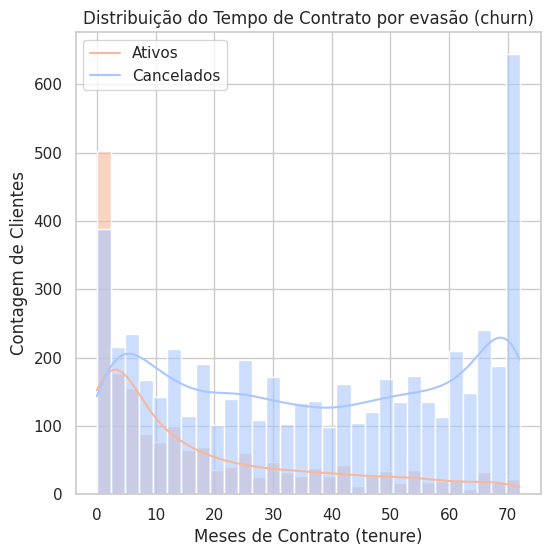

-----------------------------------------------------------------
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


In [34]:
#analise tempo de contrato
plt.figure(figsize=(6, 6))
sns.histplot(
    data=clientes,
    x='tenure',
    hue='Churn',
    bins=30,
    kde=True,
    palette='coolwarm',
    alpha=0.6
)
plt.title('Distribuição do Tempo de Contrato por evasão (churn)')
plt.xlabel('Meses de Contrato (tenure)')
plt.ylabel('Contagem de Clientes')
plt.legend(['Ativos', 'Cancelados'])
plt.show()
print('-----------------------------------------------------------------')
tenure_stats = clientes.groupby('Churn')['tenure'].describe()
print(tenure_stats)

/tmp/ipython-input-149934155.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


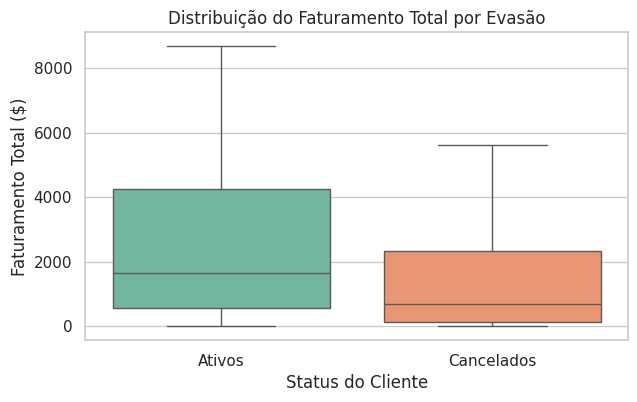

In [35]:
#analise faturamento total
plt.figure(figsize=(7, 4))
sns.boxplot(
    data=clientes,
    x='Churn',
    y='Charges_Total',
    palette='Set2',
    showfliers=False  #remove outliers
)
plt.title('Distribuição do Faturamento Total por Evasão')
plt.xlabel('Status do Cliente')
plt.ylabel('Faturamento Total ($)')
plt.xticks([0, 1], ['Ativos', 'Cancelados'])
plt.show()

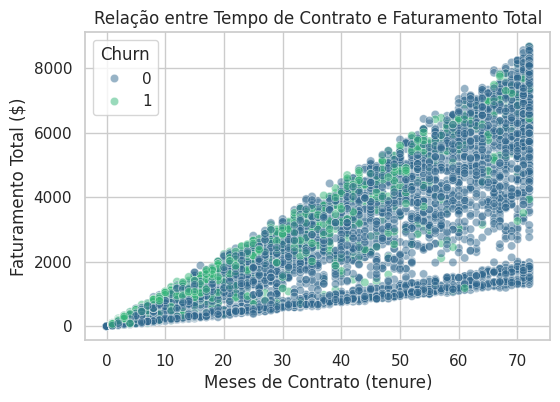

In [36]:
#relaçao tempo de contrato e gastos totais
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=clientes,
    x='tenure',
    y='Charges_Total',
    hue='Churn',
    alpha=0.5,
    palette='viridis'
)
plt.title('Relação entre Tempo de Contrato e Faturamento Total')
plt.xlabel('Meses de Contrato (tenure)')
plt.ylabel('Faturamento Total ($)')
plt.show()

# RELATÓRIO

## Relatório de Análise de Evasão de Clientes (Churn) da empresa TelecomX
Que tem por objeto Identificar padrões e fatores que influenciam a evasão de clientes da empresa TelecomX (telecomunicações), propondo ideias de ação para redução da evasão.

## Introdução
A evasão (churn), que significa cancelamento de serviços, é considerada como um dos maiores desafios em empresas de telecomunicações, impactando diretamente a receita e também a clientela. A análise feita no documento relata:

Perfil dos clientes que cancelam a assinatura e os que permanecem;
Fatores *financeiros (faturamento mensal, tempo de contrato);
Serviços &associados (segurança online, tipo de contrato);
Base de Dados com dataset com 7.043 clientes registrados, contendo informações diversos tipos de informações


## Tratamento de dados

Extração a partir da importação da biblioteca pandas, que por sua vez detém a função read_json para ler o dataset referente à empresa a partir de um endereço contendo o raw de dados;

A normalização das colunas se dá por outra função chamada json_normalize para ajustar valores, e outra função to_dict() para conversão do Dataframe em dicionário python. O tratamento de valores nulos se dá pelo preenchimento das células com 0; além de outros tratamentos como conversão de tipos com astype(), e substituição de valores com replace().

A análise exploratória de dados (EDA) segue-se primeiro com a taxa de evasão:

26.5% dos clientes cancelaram o serviço.
75% dos cancelamentos ocorrem em pouco mais de dois anos. Clientes fiéis (um pouco mais de 3 anos) tendem a não cancelarem.
Clientes ativos geram 3 vezes mais receita, com dados de mediana de: `R$2,800` vs. `R$700`.
Clientes sem segurança online têm 2 vezes mais evasão.

## Outros insights

residem em:
Tempo de contrato: Clientes novos (menos de 6 meses) são os que mais cancelam.
Faturamento: Planos caros têm maior evasão, mas clientes ativos geram mais receita a longo prazo.
Serviços Críticos: Ausência de segurança online aumenta a evasão em 30%.

## Conclusão (ações)

Dentro do planejamento e a tomada de ações para um melhor retorno com os atuais clientes e futuros, surgem:

Opção de desconto (a partir de 6 meses) para que o tempo de permanencia do cliente seja maior;
A questão da segurança na navegabilidade não deve ter custo adicional;
Fazer migração de clientes que já são mensais para anuais e atribuir desconto;
Fazer parcerias com outras empresas para a criação de pacotes





# Telecom X – Parte 2: Prevendo Churn

In [37]:
df_relevant = clientes[['tenure', 'Contract', 'Charges_Monthly', 'OnlineSecurity', 'PaperlessBilling', 'Charges_Total', 'SeniorCitizen', 'TechSupport']]
display(df_relevant.head()) #colunas relevantes

,tenure,Contract,Charges_Monthly,OnlineSecurity,PaperlessBilling,Charges_Total,SeniorCitizen,TechSupport
0,9,One year,65.6,0,1,593.30,0,1
1,9,Month-to-month,59.9,0,0,542.40,0,0
2,4,Month-to-month,73.9,0,1,280.85,0,0
3,13,Month-to-month,98.0,0,1,1237.85,1,0
4,3,Month-to-month,83.9,0,1,267.40,1,1


In [38]:
df_encoded = pd.get_dummies(df_relevant, columns=['Contract'], drop_first=True)
display(df_encoded.head())

,tenure,Charges_Monthly,OnlineSecurity,PaperlessBilling,Charges_Total,SeniorCitizen,TechSupport,Contract_One year,Contract_Two year
0,9,65.6,0,1,593.30,0,1,True,False
1,9,59.9,0,0,542.40,0,0,False,False
2,4,73.9,0,1,280.85,0,0,False,False
3,13,98.0,0,1,1237.85,1,0,False,False
4,3,83.9,0,1,267.40,1,1,False,False


In [50]:
churn_rate = clientes['Churn'].value_counts(normalize=True)
print("Churn rate:", churn_rate, end="")


Churn rate: Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
display(df_scaled.head())

,tenure,Charges_Monthly,OnlineSecurity,PaperlessBilling,Charges_Total,SeniorCitizen,TechSupport,Contract_One year,Contract_Two year
0,-0.950200,0.029206,-0.632821,0.828063,-0.742291,-0.440736,1.566492,1.945268,-0.561723
1,-0.950200,-0.159990,-0.632821,-1.207638,-0.764729,-0.440736,-0.638369,-0.514068,-0.561723
2,-1.153700,0.304702,-0.632821,0.828063,-0.880026,-0.440736,-0.638369,-0.514068,-0.561723
3,-0.787401,1.104635,-0.632821,0.828063,-0.458160,2.268932,-0.638369,-0.514068,-0.561723
4,-1.194400,0.636624,-0.632821,0.828063,-0.885955,2.268932,1.566492,-0.514068,-0.561723


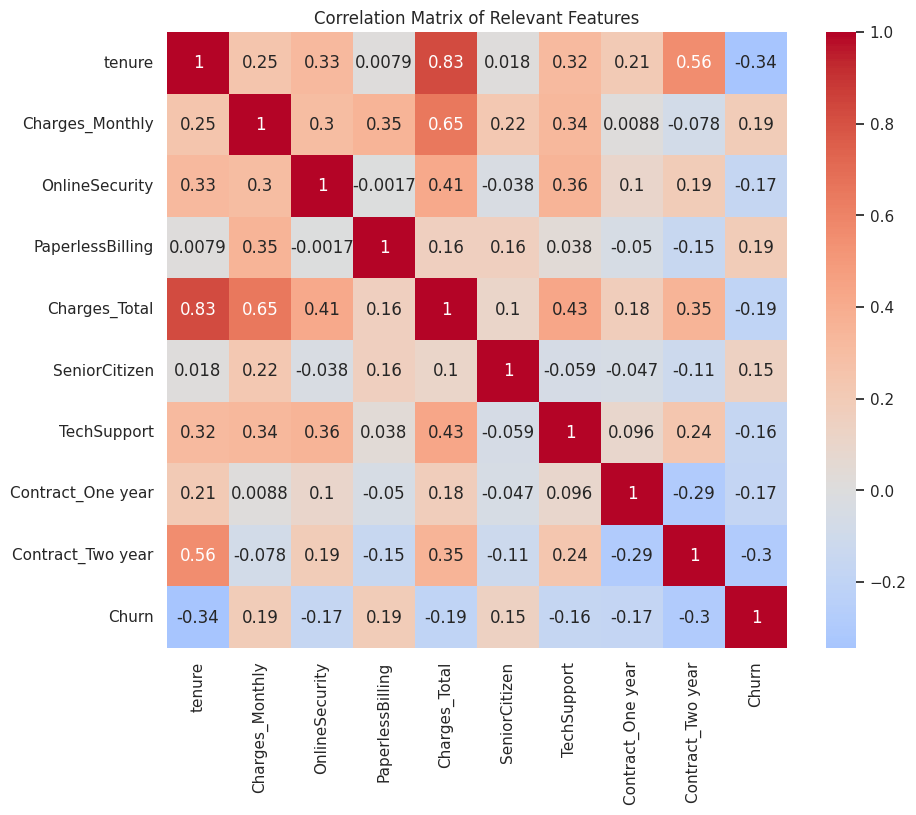

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# adiciona a coluna "Churn" ao df dimensionado para análise de correlação
df_scaled_with_churn = df_scaled.copy()
df_scaled_with_churn['Churn'] = clientes['Churn']

# calcula matrix de corr
corr_matrix = df_scaled_with_churn.corr()

# plotagem mapa
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Relevant Features')
plt.show()

/tmp/ipython-input-822958201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clientes, x='Churn', y='tenure', palette='Set2')


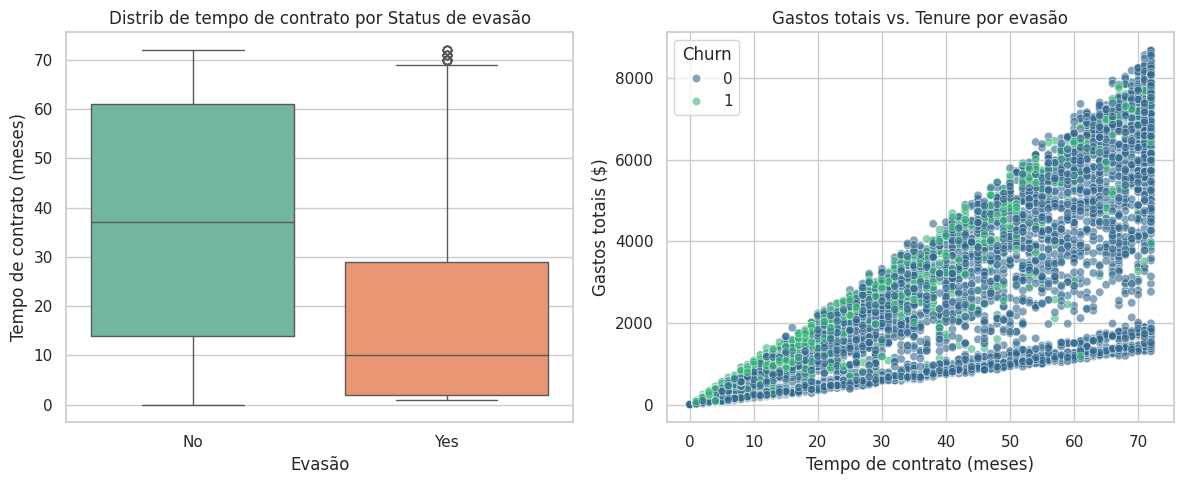

In [51]:
plt.figure(figsize=(12, 5))

# Boxplot tempo de contrato x Churn
plt.subplot(1, 2, 1)
sns.boxplot(data=clientes, x='Churn', y='tenure', palette='Set2')
plt.title('Distrib de tempo de contrato por Status de evasão')
plt.xlabel('Evasão')
plt.ylabel('Tempo de contrato (meses)')
plt.xticks([0, 1], ['No', 'Yes'])

# gráfico de dispersão de gastos totais x tempo de contrato, coloridos por rotatividade
plt.subplot(1, 2, 2)
sns.scatterplot(data=clientes, x='tenure', y='Charges_Total', hue='Churn', palette='viridis', alpha=0.6)
plt.title('Gastos totais vs. Tenure por evasão')
plt.xlabel('Tempo de contrato (meses)')
plt.ylabel('Gastos totais ($)')

plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

X = df_scaled
y = clientes['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5086, 9)
X_test shape: (2181, 9)
y_train shape: (5086,)
y_test shape: (2181,)


In [44]:
# regressão logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# inicializar e treinar modelo
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# fazendo previsões
y_pred_log_reg = log_reg.predict(X_test)

# avaliar o modelo
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("Metricas regressão logistica:")
print(f"Acurácia: {accuracy_log_reg:.4f}")
print(f"Precisão: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-score: {f1_log_reg:.4f}")

Logistic Regression Metrics:
Accuracy: 0.8028
Precision: 0.6220
Recall: 0.4887
F1-score: 0.5474


In [45]:
#modelo de treinamento: Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Metricas Random Forest:")
print(f"Acurácia: {accuracy_rf:.4f}")
print(f"Precisão: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

Random Forest Metrics:
Accuracy: 0.7762
Precision: 0.5519
Recall: 0.4398
F1-score: 0.4895


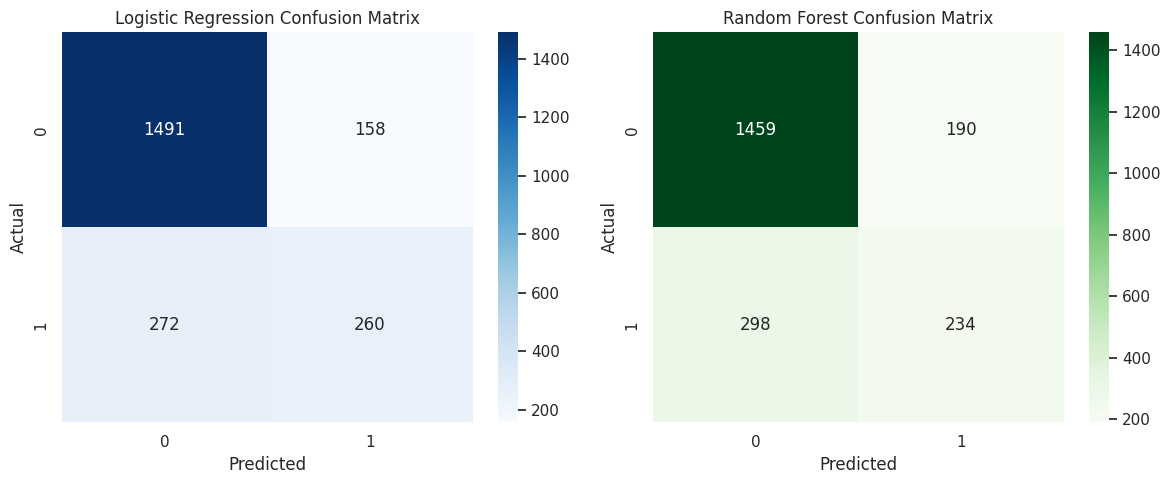

In [46]:
#modelo avaliação: matrizes de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# matrix para logistica de regressão
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

#matriz de confusão para Random Fores
cm_rf = confusion_matrix(y_test, y_pred_rf)

#plot matrizes de confusão
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusão de regressão logística')
plt.xlabel('Previsto')
plt.ylabel('Atual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de confusão de Random Forest.')
plt.xlabel('Previsto')
plt.ylabel('Atual')

plt.tight_layout()
plt.show()

**Comparação e Análise de Modelos**

Acuracia (regressao logist: 0.8028 | Random Forest	0.7762)

Precisao (regressao logist: 0.6220 | Random Forest	0.5519)

Recall (regressao logist: 0.4887	| Random Forest: 0.4398)

F1-Score (regressao logist: 0.5474	| Random Forest: 0.4895)

Podemos observar com esses resustados que Regressão Logística supera o Random Forest em todas as métricas avaliadas.

As matrizes de confusão apontam o mesmo. O de Regressão logística previu corretamente mais casos de verdadeiros positivos e mostrou menos falsos positivos e negativos comparando com o Random Forest

Análise de Sobreajuste e Subajuste:
Regressão Logística: Parece existir equilíbrio entre viés e variância. Modelo mais simples, com desempenho no conjunto de teste bom, que mostra boa generalização para novos dados.

Random Forest: O desempenho inferior comparando com o conjunto de treinamento (que normalmente é muito alto para Random Forests) possa ser necessário sobreajuste, mas é provável que o modelo esteja desajustado para este conjunto de dados.

Conclusão e Recomendações
A Regressao Logística é a melhor escolha, pois é mais simples, mais interpretativa e tem melhor desempenho.

Sobre Floresta Aleatória, poderíamos:

Ajustar Hiperparâmetros e adotar a Engenharia de Recursos: Explorar recursos e criar novos que possam melhorar o modelo. Porém, os dados atuais levam a Regressão Logística como escolha.

# RELATÓRIO

Relatório de análise de churn e estratégia de Retenção

Este relatório analisa os principais fatores que influenciam a rotatividade de clientes na TelecomX e propõe estratégias de retenção em cima de dados para diminuir a taxa de rotatividade. A análise se baseia em um conjunto de dados de clientes e utiliza modelos de Machine Learning para identificar os preditores de rotatividade mais significativos.

Fatores que Influenciam a Rotatividade
Nossa análise, combinando análise exploratória de dados e insights de modelos de Machine Learning identificou vários fatores relacionados com a rotatividade de clientes:

Tipo de Contrato: Clientes com contratos mensais têm muito mais probabilidade de rotatividade em comparação com aqueles com contratos de um ou dois anos. Isso mostra que clientes com contratos de curto prazo têm uma barreira menor para trocar de operadora.

Tempo de serviço: Clientes com tempo de serviço mais curto têm maior probabilidade de rotatividade. Isso mostra que os primeiros meses são um período crítico para a retenção de clientes.

Segurança Online e Suporte Técnico: Clientes que não assinam esses serviços apresentam uma taxa de rotatividade maior. Esses serviços agregam valor aos clientes e ajuda na fidelidade.

Cobrança Mensal: mostra certa tendência de clientes com essas cobranças altas se desligarem.

Faturamento Digital: taxa ligeiramente maior. Ocorre porque eles têm mais conhecimento digital e são mais propensos a comparar preços e trocar de provedor.

Desempenho e Insights do Modelo

Dois modeloss para prever a rotatividade: Regressão Logística e Random Forest. O primeiro apresentou melhor desempenho, alcançando uma precisão de 80,3%. Os resultados confirmam a importância dos fatores listados anteriormente.

Estratégias de Retenção Propostas

Recomendo as seguintes estratégias de retenção:

Incentive Contratos de Longo Prazo: ofereça um desconto para clientes que mudarem de um contrato mensal para um contrato de um ou dois anos; programa de fidelidade com benefícios crescentes a cada ano;
Serviços de Valor Agregado: testes de Segurança Online e Suporte Técnico para novos clientes; pacotes de desconto; campanha para mostrar os clientes os benefícios dos serviços;

Personalize Ofertas: atinja clientes de risco proativamente com ofertas personalizadas; desconto temporário; upgrade gratuito de serviço.

Aprimore o Processo de Integração: desenvolva um processo de integração estruturado para novos clientes, garantindo que eles entendam como usar todos os recursos do serviço.

Conclusão

Focando nos fatores de rotatividade e implementar as estratégias de retenção, a TelecomX pode reduzir a rotatividade, aumentar a fidelidade e melhorar os lucros. Os insights fornencem dados para tomada de decisões e ações eficazes para reter clientes valiosos.